# Буканов Никита, Лабораторная работа №4

In [278]:
%matplotlib notebook

from scipy.optimize import linprog

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Задание №1

Предприятие выпускает скоропортящуюся продукцию двух видов. Данные о ее себестоимости, отпускных ценах и объемах реализации приведены в таблице:

|Вид продукции|Себестоимость ед. продукции|Отпускная цена в день изготовления|Отпускная цена позже|Объем реализации в теплую погоду|Объем реализации в холодную погоду|
|---|---|---|---|---|---|
|1| 0.8| 1.2| 0.3| 1000| 4000|
|2 |0.5 |0.8 |0.2 |6000 |1200|

На реализацию всей произведенной продукции расходуется 200 у.е. Определить ежедневный объем производства продукции по видам, обеспечивающий предприятию наибольший доход.


In [195]:
class product():
    def __init__(self, s1, s2, s3, s4, s5):
        self.s_price = s1
        self.price_1 = s2
        self.price_2 = s3
        self.sell_1 = s4
        self.sell_2 = s5
        
product_1 = product(0.8, 1.2, 0.3, 1000, 4000)
product_2 = product(0.5, 0.8, 0.2, 6000, 1200)
payment_matrix = np.zeros((2,2))

def profit(p, S, V):
    if V <= S:
        return V*(p.price_1 - p.s_price)
    else:
        return S*(p.price_1 - p.s_price)-(V-S)*(p.s_price - p.price_2)

for i, s in enumerate([product_1.sell_1, product_1.sell_2]):
    for j, t in enumerate([product_1.sell_1, product_1.sell_2]):
        payment_matrix[i][j] += profit(product_1, s, t)
for i, s in enumerate([product_2.sell_1, product_2.sell_2]):
    for j, t in enumerate([product_2.sell_1, product_2.sell_2]):
        payment_matrix[i][j] += profit(product_2, s, t)
        
payment_matrix

array([[2200., -740.],
       [-680., 1960.]])

In [110]:
c = [-1, -1]

In [196]:
x = linprog([-1, -1], payment_matrix, [1, 1])
x

     fun: -0.0014650283553875238
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([0.00070888, 0.00075614])

In [197]:
X = -x['x']/x['fun']

In [198]:
X

array([0.48387097, 0.51612903])

In [199]:
product_1.sell_1 * X[0] + product_1.sell_2 * X[1]

2548.3870967741937

In [200]:
product_2.sell_1 * X[0] + product_2.sell_2 * X[1]

3522.5806451612902

## Задание №2
На технологическую линию поступает сырье с малым или большим количеством примесей. Линия может работать в трех режимах. Доход предприятия от реализации единицы продукции, изготовленной из сырья первого вида при различных режимах работы технологической линии, составляет соответственно 2, 5 и 6 у.е., а из сырья второго вида — 5, 3 и 1 у.е. Сколько времени в каждом режиме должна работать технологическая линия, чтобы доход от реализации продукции был максимальным?

In [207]:
payment_matrix = np.array([[-2, -5, -6],
                           [-5, -3, -1]])

In [208]:
c = [1, 1, 1]
A = payment_matrix
b = [-1, -1]

x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)

x = linprog(c, A_ub=A, b_ub=b)
x

     fun: 0.2631578947368421
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([0.10526316, 0.15789474, 0.        ])

In [209]:
X = x['x']/x['fun']

In [210]:
X

array([0.4, 0.6, 0. ])

## Задание №3
В новом жилом районе создается СТОА (автосервис) для ремонта в стационарных условиях не более 8 тыс. автомобилей в год. Для упрощения модели примем, что в подобных районах поток заявок на ремонт выражается числами 2, 4, 6 и 8 тыс. заявок в год. Прибыль от одного акта ремонта составляет 90 у.е., потери, вызванные отказом в ремонте из-за недостатка мощностей — 50 у.е.; а убытки от простоя специалистов и оборудования при отсутствии заявок — 60 у.е. Дать обоснованные рекомендации о мощности станции. Оптимум выбирать по критериям Байеса, Вальда, Сэвиджа и Гурвица.

In [235]:
a = [2, 4, 6, 8]
payment_matrix = np.zeros((4,4))
for i, p_1 in enumerate(a):
    for j, p_2 in enumerate(a):
        payment_matrix[i][j] = np.minimum(p_1, p_2)*90
        payment_matrix[i][j] -= np.maximum(0, 60*(p_2 - p_1))
        payment_matrix[i][j] -= np.maximum(0, 50*(p_1 - p_2))
payment_matrix = payment_matrix.T
payment_matrix

array([[ 180.,   80.,  -20., -120.],
       [  60.,  360.,  260.,  160.],
       [ -60.,  240.,  540.,  440.],
       [-180.,  120.,  420.,  720.]])

### Критерий Байеса

In [240]:
res = payment_matrix.mean(axis=1)
res

array([ 30., 210., 290., 270.])

#### Рекомендуемая мощность:  {{a[np.argmax (res)]}}

### Критерий Вальда

In [241]:
res = payment_matrix.min(axis=1)
res 

array([-120.,   60.,  -60., -180.])

#### Рекомендуемая мощность:  {{a[np.argmax (res)]}}

### Критерий Сэвиджа

In [247]:
R = payment_matrix.max(axis=0) - payment_matrix
R

array([[  0., 280., 560., 840.],
       [120.,   0., 280., 560.],
       [240., 120.,   0., 280.],
       [360., 240., 120.,   0.]])

In [246]:
R.max(axis=1)

array([840., 560., 280., 360.])

#### Рекомендуемая мощность:  {{a[np.argmin (R)]}}

### Критерий Гурвица

<IPython.core.display.Javascript object>


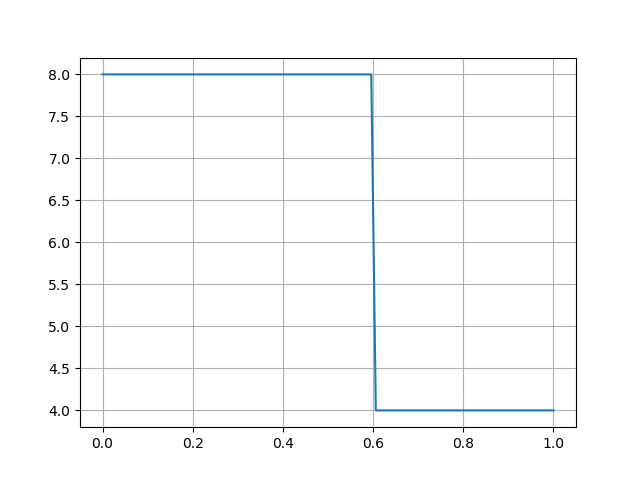

In [277]:
gamma = np.linspace(0,1,100).reshape(100,1)

res = gamma@payment_matrix.min(axis=1).reshape(1,4) + (1-gamma)@payment_matrix.max(axis=1).reshape(1,4)
a = np.array(a)
plt.plot(gamma, a[np.argmax(res, axis=1)])
plt.grid()

## Задание №4

Обыватель имеет возможность выделить 10 у.е. на формирование портфеля акций. Ценные бумаги можно приобрести у компаний А, В и С. Номинальная стоимость акции первой компании составляет 3 у.е., второй — 2 у.е., третьей — 5 у.е. На конец финансового года рынок ценных бумаг может оказаться в одном из двух состояний Z и W. Эксперты установили, что дивиденды компании А для состояния Z на конец года составят 10% от номинальной стоимости акции, а для состояния W — 15%; для компании В соответственно 8 и 12 %; для компании С — 14 и 8%.

Сформировать портфель акций обывателю, обеспечив ему возможно большую прибыль. Оптимум выбирать по критериям Байеса, Вальда, Сэвиджа и Гурвица.

In [279]:
import itertools

In [286]:
combinations = np.array([s for s in itertools.product(np.linspace(0, 1, 11), repeat=3)
                         if sum(s) == 1])

In [292]:
payment_matrix = np.zeros((2,len(combinations)))
for i, c in enumerate(combinations):
    payment_matrix[0][i] = np.dot(c, [1.10, 1.08, 1.14])
    payment_matrix[1][i] = np.dot(c, [1.15, 1.12, 1.08])
payment_matrix

array([[1.14 , 1.134, 1.128, 1.122, 1.116, 1.11 , 1.104, 1.098, 1.092,
        1.086, 1.08 , 1.136, 1.13 , 1.124, 1.118, 1.112, 1.106, 1.1  ,
        1.094, 1.088, 1.082, 1.132, 1.126, 1.12 , 1.114, 1.108, 1.102,
        1.096, 1.084, 1.128, 1.122, 1.116, 1.11 , 1.104, 1.098, 1.086,
        1.124, 1.118, 1.112, 1.106, 1.1  , 1.094, 1.088, 1.12 , 1.114,
        1.108, 1.102, 1.096, 1.09 , 1.116, 1.11 , 1.104, 1.092, 1.112,
        1.106, 1.094, 1.108, 1.102, 1.096, 1.104, 1.098, 1.1  ],
       [1.08 , 1.084, 1.088, 1.092, 1.096, 1.1  , 1.104, 1.108, 1.112,
        1.116, 1.12 , 1.087, 1.091, 1.095, 1.099, 1.103, 1.107, 1.111,
        1.115, 1.119, 1.123, 1.094, 1.098, 1.102, 1.106, 1.11 , 1.114,
        1.118, 1.126, 1.101, 1.105, 1.109, 1.113, 1.117, 1.121, 1.129,
        1.108, 1.112, 1.116, 1.12 , 1.124, 1.128, 1.132, 1.115, 1.119,
        1.123, 1.127, 1.131, 1.135, 1.122, 1.126, 1.13 , 1.138, 1.129,
        1.133, 1.141, 1.136, 1.14 , 1.144, 1.143, 1.147, 1.15 ]])

### Критерий Байеса

In [298]:
combinations[np.argmax(payment_matrix.mean(axis=0))]

array([1., 0., 0.])

### Критерий Вальда

In [300]:
combinations[np.argmax(payment_matrix.min(axis=0))]

array([0.6, 0. , 0.4])

### Критерий Сэвиджа

In [322]:
R = payment_matrix.max(axis=1).reshape(2,1) - payment_matrix
combinations[np.argmin(R.max(axis=0))]

array([0.6, 0. , 0.4])

### Критерий Гурвица

In [323]:
gamma = np.linspace(0,1,100)

In [527]:
np.argmax((matrix.min(axis=1) + matrix.max(axis=1)))

(1.0, 0.0, 0.0)

In [329]:
gamma = gamma.reshape(100,1)

In [335]:
list(zip(gamma, combinations[np.argmax(gamma@payment_matrix.min(axis=0).reshape(1,-1) + (1-gamma)@payment_matrix.max(axis=0).reshape(1,-1), axis = 1)]))

[(array([0.]), array([1., 0., 0.])),
 (array([0.01010101]), array([1., 0., 0.])),
 (array([0.02020202]), array([1., 0., 0.])),
 (array([0.03030303]), array([1., 0., 0.])),
 (array([0.04040404]), array([1., 0., 0.])),
 (array([0.05050505]), array([1., 0., 0.])),
 (array([0.06060606]), array([1., 0., 0.])),
 (array([0.07070707]), array([1., 0., 0.])),
 (array([0.08080808]), array([1., 0., 0.])),
 (array([0.09090909]), array([1., 0., 0.])),
 (array([0.1010101]), array([1., 0., 0.])),
 (array([0.11111111]), array([1., 0., 0.])),
 (array([0.12121212]), array([1., 0., 0.])),
 (array([0.13131313]), array([1., 0., 0.])),
 (array([0.14141414]), array([1., 0., 0.])),
 (array([0.15151515]), array([1., 0., 0.])),
 (array([0.16161616]), array([1., 0., 0.])),
 (array([0.17171717]), array([1., 0., 0.])),
 (array([0.18181818]), array([1., 0., 0.])),
 (array([0.19191919]), array([1., 0., 0.])),
 (array([0.2020202]), array([1., 0., 0.])),
 (array([0.21212121]), array([1., 0., 0.])),
 (array([0.22222222]